# Unsupervised learning
When working a dataset having dependent and independent variables but no class labels then we can train a machine learning model using unsupervised learning algorithms. Clustering of data is an example of unsupervised learning because here we group the data points without having any specific name for each group. The `sklearn` library has various algorithms for unsupervised learning. Here we'll walk through the kmeans clustering algorithm using the iris dataset which contains data for four different parameters from three species of iris plant.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 

You can either download the iris dataset as a csv file and read it in a dataframe using `read_csv` function or directly load the dataset using the URL to create a new dataframe using the same function. We'll load the iris data using the second option. In this data there are no headers i.e. there are no column names, so we'll also create a list having the appropriate column names and pass is as an argument to the `read_csv` function.

In [2]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris =  pd.read_csv(csv_url, names = col_names)
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data pre-processing
Create `x` and `y` matrices having the observations and labels respectively. The `x` matrix would comprise of only the values of all the features for all the samples. This would be used for training the machine learning model. The `y` matrix would have the labels correponding to the samples in the `x` matrix. The `y` matrix is used in supervised classification. The `x` matrix is a 2d array with shape *n_samples by n_features* while the `y` matrix is a one dimensional array.

In [3]:
x = iris.loc[:,iris.columns[0:4]].values
y = iris.loc[:,"Class"].values

print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [49]:
## To get classes as int
y_int = pd.get_dummies(y).values.argmax(1)
y_int

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [50]:
y_int.shape

(150,)

In [52]:
iris["Class"].replace(['Iris-setosa', 'Iris-versicolor','Iris-virginica'], [1,2,3]).values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

## Model building

Next, a machine learning model would be built using the kmeans algorithm to predict the labels of the data i.e. the `x` matrix. This is achieved by instantiating a `KMeans` object with required arguments. The `n_cluster` keyword argument specifies the number of clusters that we want. In Kmeans jargon this number specifies the number of centroid to generate. the default value for this is 8. For our data we'll set its value to 3 because we know that the data is from three species. In case we don't know how many clusters to expect, we can figure that out using the elbow method which we'll cover in a while. The `init` argument is for initializing the positioning of the centroids. We can set the initial position based on an empirical probability distribution of the data points using the `k-means++` or we can also specify the exact location for initial positioning of centroids. The `n_init` and `max_iter` arguments refer to number of independent runs of the kmeans algorirhtm and maximum number of iterations of the algorithm in each run, respectively. Setting the `random_state` argument to an `int` ensures the reproducibilty of the results. 

Once we have instantiate a KMeans object, we can use the `fit_predict` function to first fit the data to the model, and then predict the label of the given data. It returns an array of labels corresponding to the each data point (sample).

In [65]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

The `fit_predict` function returns the predicted index of the cluster corresponding to all the data points. Note that this function is effectively a combination of two functions &ndash; `fit` and `predict`.
Once the data has been fitted to the KMeans object, different output parameters for the model can be accessed through its attributes such as
 - `cluster_centers_` to get the coordinates of all the centroids 
 - `labels_` to get the predicted labels (cluster indices) for the data points.

The `predict` function can be used to predict the label for a given data point. 


In [66]:
#get centers for each of the clusters
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [56]:
#predicting the cluster of an unknown observation
kmeans.predict([[5.1,3.,1.4,0.2]])

array([1])

### Compare the predicted labels with the original labels
When the data is fitted to the KMeans model, the predicted labels could be in any order i.e. the cluster are numbered randomly. Therefore, direct mapping of the predicted labels and original labels could result in misleading interpretations of the prediction accuracy. So, to compare the predicted cluster with the original labels, we need to take into account this characteristic of the clustering function. The `adjusted_rand_score` function compares the members of different cluster in context of the cluster labels.

In [57]:
print(y)
print(kmeans.labels_)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [59]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, kmeans.labels_)

0.7302382722834697

To perform the visual assessment of the predictions, let's plot the clusters using first two features. This way it would be convenient to see the differences in the original and predicted labels in a two-dimensional graph. We'll first create a copy of the iris dataframe and add a new column which would hold the predicted labels. Subsequently, the `scatterplot` function from the seaborn library for plotting and the coloring of the data points would be based on the class labels (original and predicted separately).

In [60]:
import seaborn as sns

In [39]:
iris_predicted = iris.copy()
iris_predicted["Predicted_Class"] = y_kmeans
iris_predicted.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class,Predicted_Class
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


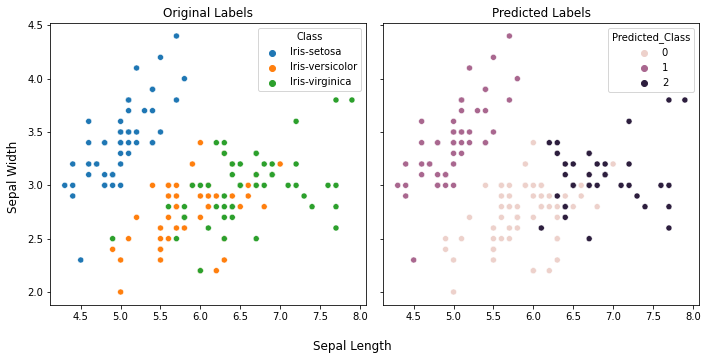

In [40]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)

ax[0].set_title("Original Labels")
sns.scatterplot(data=iris_predicted, x="Sepal_Length", y="Sepal_Width", ax=ax[0], hue="Class")
ax[0].set_xlabel("")
ax[0].set_ylabel("")

ax[1].set_title("Predicted Labels")
sns.scatterplot(data=iris_predicted, x="Sepal_Length", y="Sepal_Width", ax=ax[1], hue="Predicted_Class")
ax[1].set_xlabel("")

fig.supxlabel("Sepal Length")
fig.supylabel("Sepal Width")
plt.tight_layout()

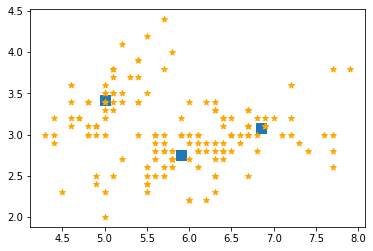

In [67]:
centers = kmeans.cluster_centers_
fix,ax = plt.subplots()

ax.scatter(centers[:,0],centers[:,1], marker='s', s=100)
ax.scatter(x[:,0],x[:,1], marker="*", color="orange")

Similarly, we can plot pairwise plot for all the features in the dataframe using `sns.pairplot` function.

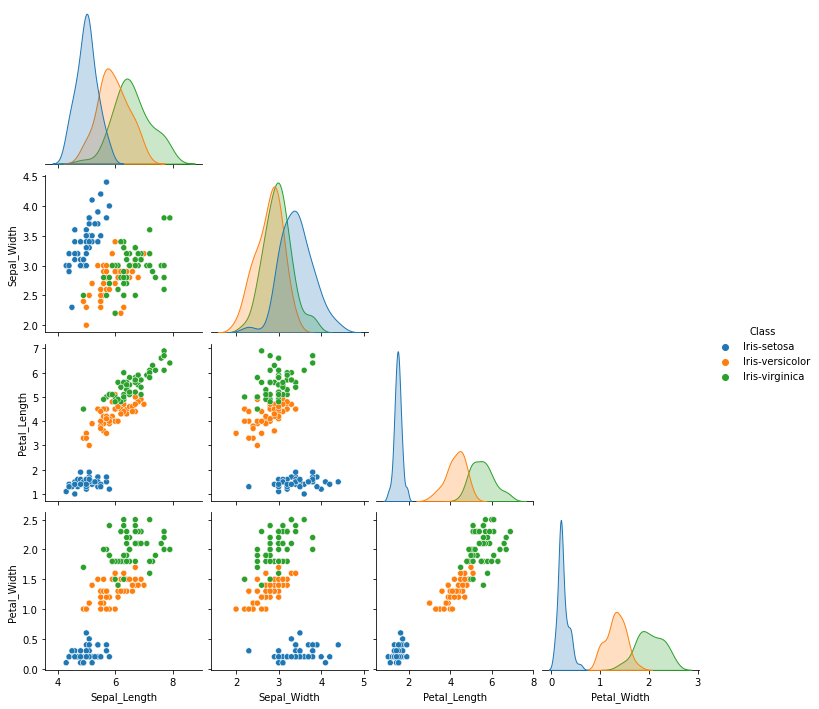

In [64]:
p1 = sns.pairplot(data=iris, hue="Class", corner=True)

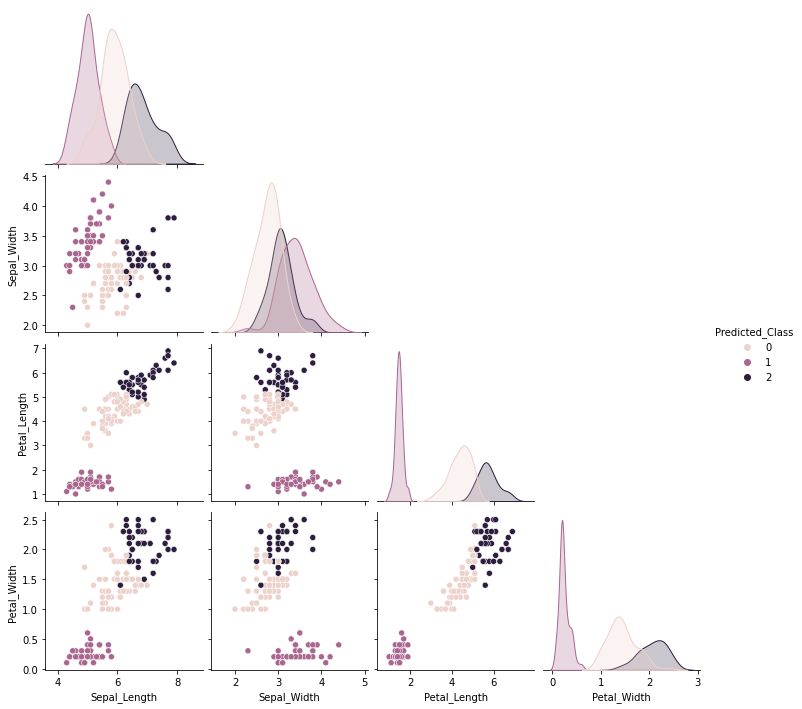

In [75]:
p2 = sns.pairplot(data=iris_predicted, hue="Predicted_Class", corner=True)

## Finding optimal number of clusters

One of the most important hyperparameter for a KMeans object is the `n_clusters` which stores the value for the number of clusters to create. We can empirically determine an suitable value for this hyperparameter by using the elbow method. In this, we'll iteratively fit the data to the kMeans objects instantiated with different number values for `n_clusters`. Algorithmically speaking, the KMeans algorithm select centroids that minimize the inertia (or within-cluster sum-of-squares). In other words, the coordinates for the centroids are such that the sum of distances between each data point (within a cluster) and the cluster center is minimum. Now, upon plotting the inertia values vs the number of clusters, the graph tends to plateau around the optimal number of clusters; which appears like an elbow. As the number of clusters increase there is a decrease in inertia, however, after a certain number of clusters the decrease in inertia is much less compared to what was observed initially. Mathematically, the K-means algorithm operates to minimize the inertia as follows ([reference](https://scikit-learn.org/stable/modules/clustering.html)):

$$
\sum_{i=0}^{n}\underset{\mu_{j} \in C}{\mathrm{min}} (||x_{i} - \mu_{j}||^{2})
$$

where, $\mu_{j}$ is a cluster center and $C$ is the set of all clusters. $x_{i}$ denotes a data point in a given cluster.

In [7]:
import warnings
warnings.filterwarnings('ignore')

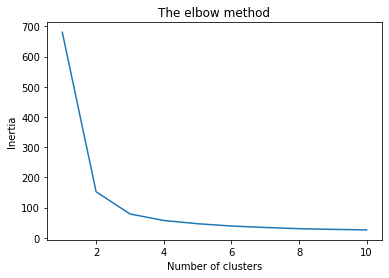

In [61]:
wcss = [] #within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, \
                    n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()